In [1]:
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/Albedo_Map.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPFe_Map.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPK_Map.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTh_Map.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTi_Map.csv

--2021-03-29 04:54:48--  https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/Albedo_Map.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2332802 (2.2M) [text/plain]
Saving to: ‘Albedo_Map.csv’

Albedo_Map.csv      100%[===================>]   2.22M  --.-KB/s    in 0.1s    

2021-03-29 04:54:49 (17.9 MB/s) - ‘Albedo_Map.csv’ saved [2332802/2332802]

--2021-03-29 04:54:49--  https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPFe_Map.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
albedo_df = pd.read_csv("Albedo_Map.csv", header=None)
albedo_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719
0,0.331936,0.332611,0.332240,0.331028,0.331094,0.332614,0.331964,0.329994,0.327853,0.326532,0.323979,0.326049,0.327282,0.327233,0.327399,0.328471,0.329590,0.328552,0.325894,0.326038,0.323651,0.324821,0.323638,0.324663,0.325864,0.326459,0.324879,0.324290,0.326131,0.326381,0.325966,0.328039,0.326803,0.326900,0.325590,0.327239,0.327063,0.324707,0.325605,0.325192,...,0.333238,0.333967,0.338332,0.333807,0.337262,0.336101,0.333927,0.333388,0.333628,0.334652,0.334718,0.333925,0.335560,0.335058,0.332420,0.333466,0.334701,0.332450,0.332234,0.330962,0.331441,0.329907,0.331534,0.329963,0.329674,0.329519,0.329535,0.329197,0.327843,0.328705,0.330389,0.329089,0.330334,0.333719,0.334709,0.334640,0.332491,0.334664,0.332983,0.331635
1,0.338990,0.340417,0.334623,0.333716,0.331404,0.331733,0.335648,0.335849,0.333166,0.332413,0.333944,0.333540,0.330949,0.333801,0.333736,0.333912,0.332594,0.330806,0.329735,0.329584,0.330415,0.332988,0.333489,0.333583,0.334091,0.333665,0.333154,0.334841,0.333108,0.330603,0.333521,0.334824,0.337418,0.338038,0.338208,0.335795,0.333117,0.331167,0.331473,0.331722,...,0.333103,0.335765,0.333349,0.332908,0.332857,0.332631,0.334238,0.333887,0.334760,0.333976,0.333520,0.332502,0.332850,0.334453,0.334272,0.332301,0.332491,0.333850,0.332773,0.333611,0.335997,0.337525,0.341041,0.341578,0.344238,0.344957,0.347249,0.351415,0.347487,0.346911,0.350386,0.346509,0.341890,0.345887,0.345619,0.344203,0.345772,0.341238,0.342606,0.338984
2,0.324930,0.325832,0.328177,0.325871,0.321231,0.321791,0.322595,0.325254,0.329132,0.325335,0.325188,0.328423,0.330945,0.325213,0.326284,0.333908,0.335282,0.331032,0.329513,0.330302,0.329004,0.332888,0.335060,0.329965,0.333092,0.326922,0.318637,0.327397,0.337512,0.329110,0.323021,0.326859,0.334606,0.325460,0.327213,0.329528,0.329077,0.331946,0.328525,0.340804,...,0.334297,0.330956,0.330130,0.345104,0.333438,0.331804,0.327494,0.327608,0.329688,0.327911,0.324279,0.325155,0.326681,0.329403,0.330051,0.330159,0.329290,0.330804,0.326379,0.332008,0.335370,0.336173,0.332193,0.332566,0.330010,0.327636,0.331234,0.330837,0.329262,0.333553,0.329577,0.332204,0.330471,0.330105,0.331836,0.335386,0.335075,0.333190,0.327436,0.330122
3,0.327572,0.327171,0.333880,0.326805,0.328176,0.327048,0.326413,0.332305,0.325137,0.325540,0.329610,0.324541,0.319637,0.322687,0.330344,0.329083,0.333164,0.341310,0.341391,0.339584,0.351785,0.336289,0.323558,0.324671,0.324300,0.334346,0.335219,0.327852,0.334429,0.334926,0.344134,0.339596,0.308848,0.334172,0.334033,0.326963,0.335013,0.332653,0.326879,0.330008,...,0.319711,0.325468,0.324364,0.324342,0.328160,0.337554,0.331554,0.331412,0.339405,0.334231,0.328024,0.320542,0.322952,0.322280,0.324904,0.318523,0.321628,0.321274,0.319644,0.322043,0.322067,0.324264,0.321730,0.317704,0.318357,0.317234,0.323211,0.321648,0.320784,0.320090,0.317473,0.314289,0.321126,0.317036,0.320553,0.312072,0.311713,0.315656,0.317066,0.319407
4,0.347444,0.340715,0.330832,0.335570,0.340129,0.332496,0.335220,0.336632,0.334052,0.328328,0.337093,0.338844,0.340164,0.325842,0.323979,0.334600,0.332681,0.330383,0.326714,0.319855,0.327775,0.323051,0.314324,0.319347,0.323304,0.322364,0.323075,0.317739,0.326617,0.318640,0.312888,0.313375,0.322154,0.335421,0.323547,0.316552,0.305872,0.303948,0.316681,0.322793,...,0.312570,0.320022,0.320767,0.316615,0.318317,0.323877,0.319800,0.319975,0.326541,0.321408,0.325221,0.324919,0.323828,0.326725,0.326630,0.325381,0.322274,0.326340,0.323620,0.322120,0.321234,0.331587,0.326766,0.329039,0.337120,0.334527,0.332917,0.330705,0.330171,0.333648,0.319792,0.332530,0.334123,0.332214,0.343655,0.333832,0.352028,0.340800,0.348094,0.349389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [8]:
# Set plotting parameters
plt.style.use('seaborn')
cmap = plt.get_cmap('jet', 20)

In [11]:
# A check to avoid reloading variables again
try:
  del x_train, y_train
  del x_test, y_test
  del fe_df, k_df, th_df, ti_df
  print("Cleared previously loaded variables")
except:
  pass

In [12]:
fe_df = pd.read_csv("LPFe_Map.csv", header=None)
k_df = pd.read_csv("LPK_Map.csv", header=None)
th_df = pd.read_csv("LPTh_Map.csv", header=None)
ti_df = pd.read_csv("LPTi_Map.csv", header=None)

Text(0.5, 1.0, 'Lunar Albedo')

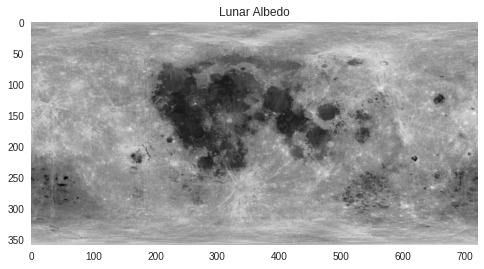

In [13]:
plt.imshow(albedo_df, cmap="Greys_r")
plt.grid(False)
plt.title("Lunar Albedo")

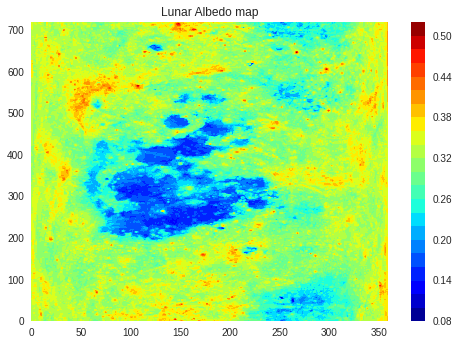

In [14]:
def contour_params_plot(df):
  """
  df: A Pandas DataFrame object
  """
  y = df.index.values
  x = df.columns.values
  z = df.to_numpy()

  meshx, meshy = np.meshgrid(x, y)

  return meshx, meshy, z

ax, ay, az = contour_params_plot(albedo_df)
plt.contourf(ay, ax, az, 20, cmap='jet')
plt.title("Lunar Albedo map")
plt.colorbar()

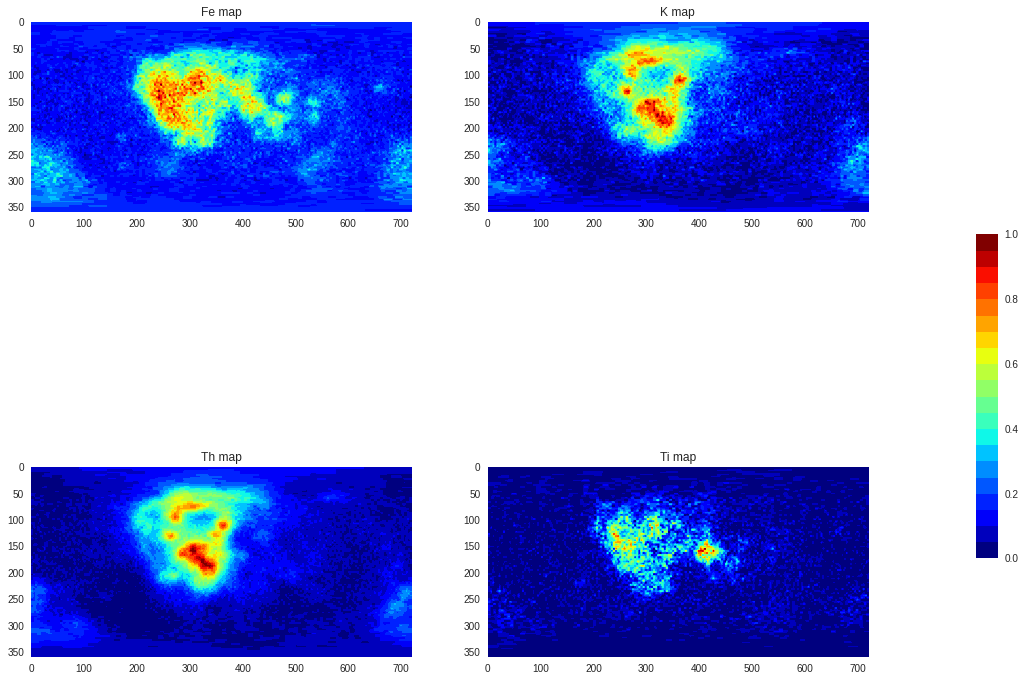

In [46]:
# x, y, fez = contour_params_plot(fe_df)
# _, _, kz = contour_params_plot(k_df)
# _, _, thz = contour_params_plot(th_df)
# _, _, tiz = contour_params_plot(ti_df)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sm = plt.cm.ScalarMappable(cmap=cmap)
cbar_ax = fig.add_axes([1.00, 0.30, 0.02, 0.30])
fig.colorbar(sm, cax=cbar_ax)

axes[0, 0].imshow(fe_df, cmap=cmap)
axes[0, 0].set_title("Fe map")
axes[0, 0].grid(False)

axes[0, 1].imshow(k_df, cmap=cmap)
axes[0, 1].set_title("K map")
axes[0, 1].grid(False)

axes[1, 0].imshow(th_df, cmap=cmap)
axes[1, 0].set_title("Th map")
axes[1, 0].grid(False)

axes[1, 1].imshow(ti_df,cmap=cmap)
axes[1, 1].set_title("Ti map")
axes[1, 1].grid(False)

In [32]:
def divide_map(map, n=2):
  """
  map: A 2-D Numpy array or Pandas dataframe representing the map.
  n: int, The no. of vertical sections of the map, default to 2.

  Returns:
  -------
  A list of vertical map sections
  """

  if isinstance(map, pd.DataFrame):
    split_list = np.hsplit(map.to_numpy(), n)
  else:
    split_list = np.hsplit(map, n)
  
  return split_list

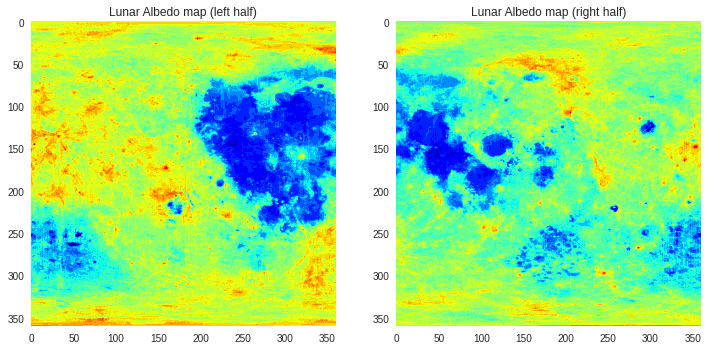

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

left, right = divide_map(albedo_df)

#lx, ly, lz = contour_params_plot(pd.DataFrame(left))
ax[0].imshow(left, cmap=cmap)
ax[0].set_title("Lunar Albedo map (left half)")
ax[0].grid(False)

#rx, ry, rz = contour_params_plot(pd.DataFrame(right))
ax[1].imshow(right, cmap=cmap)
ax[1].set_title("Lunar Albedo map (right half)")
ax[1].grid(False)

plt.show()

In [36]:
fe_left, fe_right = divide_map(fe_df)
k_left, k_right = divide_map(k_df)
th_left, th_right = divide_map(th_df)
ti_left, ti_right = divide_map(ti_df)

In [37]:
def create_dataset(fe_left, k_left, th_left, ti_left, left):
  """
  Parameters:
  -----------
  NumPy arrays
  
  Returns a list of dataframe objects 
  """

  fe_l = fe_left.reshape(-1, 1).squeeze()
  k_l = k_left.reshape(-1, 1).squeeze()
  th_l = th_left.reshape(-1, 1).squeeze()
  ti_l = ti_left.reshape(-1, 1).squeeze()
  value_l = left.reshape(-1, 1).squeeze()

  return [fe_l, k_l, th_l, ti_l, value_l]

In [38]:
train_data = pd.DataFrame(np.array(create_dataset(fe_left, k_left, th_left, ti_left, left)).T)
train_data.rename(columns={0: "Fe", 1: "K", 2: "Th", 3: "Ti", 4: "Pixel_value"}, inplace=True)
train_data

,Fe,K,Th,Ti,Pixel_value
0,4.04409,788.81,1.26750,0.190154,0.331936
1,4.04409,788.81,1.26750,0.190154,0.332611
2,4.04409,788.81,1.26750,0.190154,0.332240
3,4.04409,788.81,1.26750,0.190154,0.331028
4,4.04409,788.81,1.26750,0.190154,0.331094
...,...,...,...,...,...
129595,3.82753,455.07,0.79856,0.112137,0.336662
129596,3.82753,455.07,0.79856,0.112137,0.336568
129597,3.82753,455.07,0.79856,0.112137,0.340123
129598,3.82753,455.07,0.79856,0.112137,0.335563


In [39]:
test_data = pd.DataFrame(np.array(create_dataset(fe_right, k_right, th_right, ti_right, right)).T)
test_data.rename(columns={0: "Fe", 1: "K", 2: "Th", 3: "Ti", 4: "Pixel_value"}, inplace=True)
test_data

,Fe,K,Th,Ti,Pixel_value
0,4.04409,788.81,1.26750,0.190154,0.318497
1,4.04409,788.81,1.26750,0.190154,0.317900
2,4.04409,788.81,1.26750,0.190154,0.317447
3,4.04409,788.81,1.26750,0.190154,0.316924
4,4.04409,788.81,1.26750,0.190154,0.317665
...,...,...,...,...,...
129595,3.82753,455.07,0.79856,0.112137,0.392867
129596,3.82753,455.07,0.79856,0.112137,0.394093
129597,3.82753,455.07,0.79856,0.112137,0.394808
129598,3.82753,455.07,0.79856,0.112137,0.390155


In [40]:
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]

In [41]:
x_test = test_data[train_data.columns[:-1]]
y_test = test_data[train_data.columns[-1]]

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def metric_eval(y_test, prediction, metric="rmse"):
  """
  metric: 'mse' or 'mae' or 'rmse', default to 'rmse'
  """

  if metric == "mse":
    error = mean_squared_error(y_test, prediction)
  elif metric == "mae":
    error = mean_absolute_error(y_test, prediction)
  else:
    error = mean_squared_error(y_test, prediction, squared=False)
  
  return error

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

Metric used to evaluate performance: Root mean squared error (rmse)

In [136]:
models = [("linreg", LinearRegression), ("rfr", RandomForestRegressor), ("lsvr", LinearSVR), 
          ("knnreg", KNeighborsRegressor), ("xgbreg", xgb.XGBRegressor)]

def exp_all_models(x_train, y_train, x_test, y_test, models):
  errors = list()
  predictions = list()
  for name, model in models:
    if name == "rfr":
      model_ = model(n_estimators=300, random_state=0)
    elif name == "lsvr" or name == "sgr":
      model_ = model(max_iter=6000)
    elif name == "knnreg":
      model_ = model(n_neighbors=10)
    elif name == "xgbreg":
      model_ = model(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01, 
                     max_depth = 7, alpha = 10, n_estimators = 100)
    else:
      model_ = model()
    model_.fit(x_train, y_train)
    prediction = model_.predict(x_test)
    rmse = metric_eval(y_test, prediction)
    errors.append(rmse)
    predictions.append(prediction)

  return predictions, errors

def unravel_map(prediction, right):
  unravel_prediction = prediction.reshape(right.shape)
  return unravel_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[13:42:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


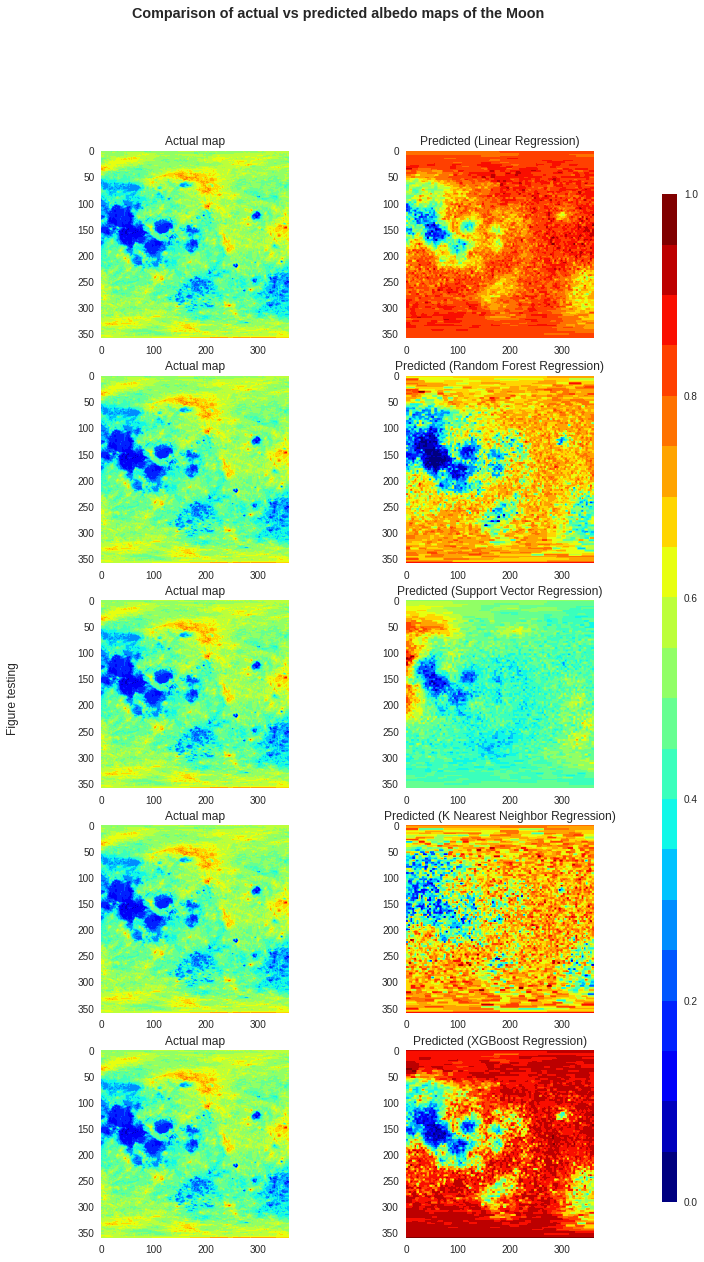

<Figure size 576x396 with 0 Axes>

In [137]:
predictions, errors = exp_all_models(x_train, y_train, x_test, y_test, models)
unraveled_predictions = [unravel_map(prediction, right) for prediction in predictions]

n = 5 # No. of models run
fig, axes = plt.subplots(n, 2, figsize=(10, 20))
fig.suptitle("Comparison of actual vs predicted albedo maps of the Moon", fontweight="bold")
fig.text(0.04, 0.5, "Figure testing", va='center', rotation='vertical')

# Define a mappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(sm, cax=cbar_ax)

ax1 = plt.subplot2grid((5, 2), (0, 0))
ax2 = plt.subplot2grid((5, 2), (0, 1))
ax3 = plt.subplot2grid((5, 2), (1, 0))
ax4 = plt.subplot2grid((5, 2), (1, 1))
ax5 = plt.subplot2grid((5, 2), (2, 0))
ax6 = plt.subplot2grid((5, 2), (2, 1))
ax7 = plt.subplot2grid((5, 2), (3, 0))
ax8 = plt.subplot2grid((5, 2), (3, 1))
ax9 = plt.subplot2grid((5, 2), (4, 0))
ax10 = plt.subplot2grid((5, 2), (4, 1))

ax1.imshow(right, cmap=cmap)
ax1.set_title("Actual map")
ax1.grid(False)

# Linear Regression
ax2.imshow(unraveled_predictions[0], cmap=cmap)
ax2.set_title("Predicted (Linear Regression)")
ax2.grid(False)

ax3.imshow(right, cmap=cmap)
ax3.set_title("Actual map")
ax3.grid(False)

# Random Forest regressor
ax4.imshow(unraveled_predictions[1], cmap=cmap)
ax4.set_title("Predicted (Random Forest Regression)")
ax4.grid(False)

ax5.imshow(right, cmap=cmap)
ax5.set_title("Actual map")
ax5.grid(False)

# Linear Support Vector Regressor
ax6.imshow(unraveled_predictions[2], cmap=cmap)
ax6.set_title("Predicted (Support Vector Regression)")
ax6.grid(False)

ax7.imshow(right, cmap=cmap)
ax7.set_title("Actual map")
ax7.grid(False)

# K Nearest Neighbor Regressor
ax8.imshow(unraveled_predictions[3], cmap=cmap)
ax8.set_title("Predicted (K Nearest Neighbor Regression)")
ax8.grid(False)

ax9.imshow(right, cmap=cmap)
ax9.set_title("Actual map")
ax9.grid(False)

# SGD Regressor
ax10.imshow(unraveled_predictions[4], cmap=cmap)
ax10.set_title("Predicted (XGBoost Regression)")
ax10.grid(False)

plt.show()
plt.tight_layout()

It seems that the bluer (lower value) regions are predicted more accurately than the other regions for all the models.

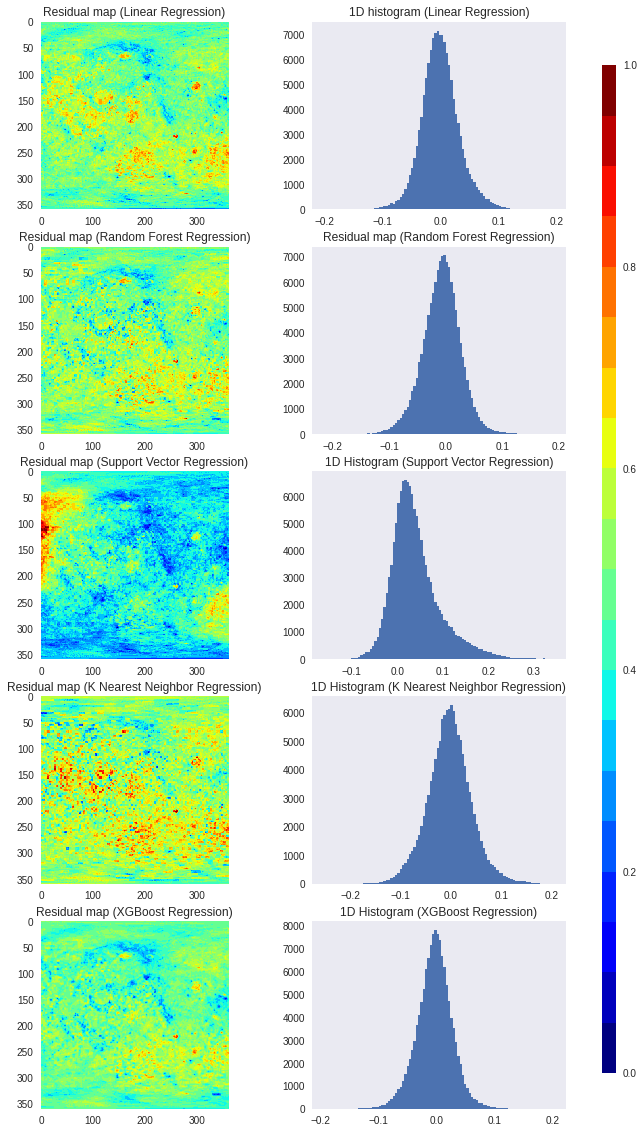

In [138]:
fig, axes = plt.subplots(n, 2, figsize=(10, 20))

n_bins = 100
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(sm, cax=cbar_ax)

residual_0 = unraveled_predictions[0] - right
residual_1 = unraveled_predictions[1] - right
residual_2 = unraveled_predictions[2] - right
residual_3 = unraveled_predictions[3] - right
residual_4 = unraveled_predictions[4] - right

plt.subplots_adjust()

axes[0, 0].imshow(residual_0, interpolation="none", cmap=cmap)
axes[0, 0].set_title("Residual map (Linear Regression)")
axes[0, 0].grid(False)
axes[0, 1].hist(residual_0.flatten(), bins=n_bins)
axes[0, 1].set_title("1D histogram (Linear Regression)")
axes[0, 1].grid(False)

axes[1, 0].imshow(residual_1, interpolation="none", cmap=cmap)
axes[1, 0].set_title("Residual map (Random Forest Regression)")
axes[1, 0].grid(False)
axes[1, 1].hist(residual_1.flatten(), bins=n_bins)
axes[1, 1].set_title("Residual map (Random Forest Regression)")
axes[1, 1].grid(False)

axes[2, 0].imshow(residual_2, interpolation="none", cmap=cmap)
axes[2, 0].set_title("Residual map (Support Vector Regression)")
axes[2, 0].grid(False)
axes[2, 1].hist(residual_2.flatten(), bins=n_bins)
axes[2, 1].set_title("1D Histogram (Support Vector Regression)")
axes[2, 1].grid(False)

axes[3, 0].imshow(residual_3, interpolation="none", cmap=cmap)
axes[3, 0].set_title("Residual map (K Nearest Neighbor Regression)")
axes[3, 0].grid(False)
axes[3, 1].hist(residual_3.flatten(), bins=n_bins)
axes[3, 1].set_title("1D Histogram (K Nearest Neighbor Regression)")
axes[3, 1].grid(False)

axes[4, 0].imshow(residual_4, cmap=cmap)
axes[4, 0].set_title("Residual map (XGBoost Regression)")
axes[4, 0].grid(False)
axes[4, 1].hist(residual_4.flatten(), bins=n_bins)
axes[4, 1].set_title("1D Histogram (XGBoost Regression)")
axes[4, 1].grid(False)

plt.show()

In [141]:
print(errors)

[0.032015064149753816, 0.03422855711750289, 0.06738184277029138, 0.04405718121706757, 0.03089871895457188]


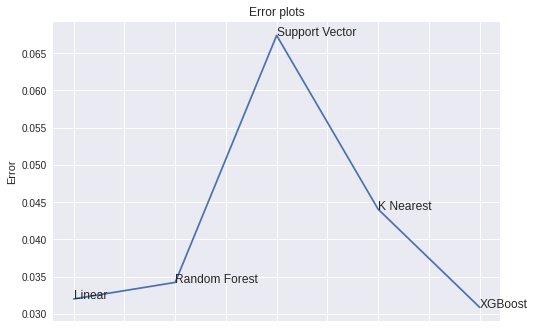

In [140]:
plt.rcParams["font.size"] = 12

plt.plot(errors)
pts = list(enumerate(errors))
plt.annotate("Linear", pts[0])
plt.annotate("Random Forest", pts[1])
plt.annotate("Support Vector", pts[2])
plt.annotate("K Nearest", pts[3])
plt.annotate("XGBoost", pts[4])

plt.tick_params(bottom=False, labelbottom=False)
plt.ylabel("Error")
plt.title("Error plots")

plt.show()

### Analysis
---

As seen from the the predicted maps, `XGBoostRegressor` (xgbr) works the best for the task. `RandomForestRegressor` (rfr) also works good whereas `LinearSVR` doesn't converge even up-to 6000 iterations and `SGDRegressor` is the worst model. Moreover, a simple `LinearRegressor` (lr) model works nearly as good as a `RandomForestRegressor`. Some observations:


1.   `xgbr` has a relatively smoother residual map with pixel values not exploding towards the yellow-orange region indicating that the residuals are low. It is also partially true for linear regressor and random forest regressor.
2. The 1-D histogram for all of them have maximum count near the 0 pixel value range, demonstrating that many of the predicted pixel values are close to the ground truth albedo map.
3. The `KNeighborsRegressor` has a slightly longer prevailing tail in the 1D histogram plot, indicating a slightly worser performance than others.

Other points:

1. A non-linear SVR takes huge amount of time to fit the dataset, hence a linear version, in the form of `LinearSVR` is used here. Also, the `LinearSVR` didn't fit the dataset optimally as can be seen from the warning above.
2. Since `XGBoostRegressor` works the best, it might be a good opportunity to gauge it's performance by tweaking it's hyperparameters. 
3. In this implementation, I have converted the maps from a 2D to 1D representation. Machine learning algorithms or potential Deep learning algorithms that could work on maps as they are (2D) and without flattening the pixels might be an interesting place to explore.
4. Plotting the correlation of variables from the flattened dataset can give us the following immediate consequences:


*   There seems to be almost no correlation between albedo (`Pixel_value`) and the concentration of elements.
*   There does seem to be a significant correlation between (`Th` and `K`), (`Ti` and `Fe`).

As a result, deep learning architectures that can learn correlation between albedo and elemental composition could potentially perform better than the ones implemented here.



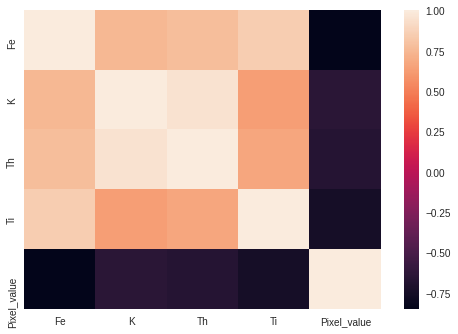

In [61]:
sns.heatmap(train_data.corr())

One particular observation is that concentration of `Fe` and `albedo` have nearly an inverse relationship, which is also evident from the albedo and Fe map.

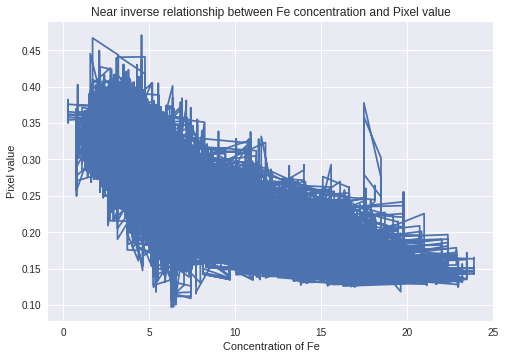

In [100]:
plt.plot(train_data["Fe"], train_data["Pixel_value"])
plt.title("Near inverse relationship between Fe concentration and Pixel value")
plt.xlabel("Concentration of Fe")
plt.ylabel("Pixel value")
plt.show()

Choosing the best hyperparameters for `XGBoostRegressor`

In [125]:
lrs = [0.1, 0.01, 0.001]
nests = [100, 400, 500, 600]
max_depths = [5, 7, 10]

errors = list()

min_err = np.inf
for depth in max_depths:
  for nest in nests:
    for lr in lrs:
      model_ = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = lr, 
                     max_depth = depth, alpha = 10, n_estimators = nest)
      model_.fit(x_train, y_train)
      predx = model_.predict(x_test)
      errx = metric_eval(y_test, predx)
      errors.append(errx)
      if errx < min_err:
        min_err = errx
        final_xgbr_model = model_

In [126]:
# Print model hyperparaneters

print(f"Learning rate: {final_xgbr_model.learning_rate}")
print(f"No. of estimators: {final_xgbr_model.n_estimators}")
print(f"Max depth: {final_xgbr_model.max_depth}")

Learning rate: 0.1
No. of estimators: 400
Max depth: 5


In [131]:
# Use this model for prediction

final_xgbr_model.fit(x_train, y_train)
final_pred = final_xgbr_model.predict(x_test)
unravel_final_pred = unravel_map(final_pred, right)

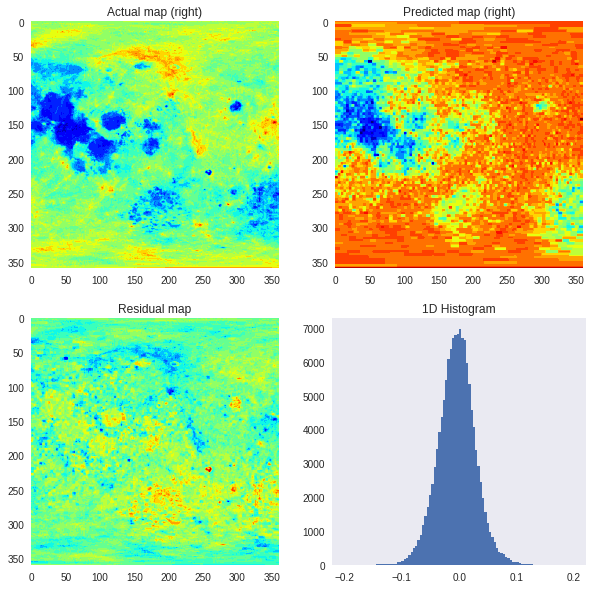

In [132]:
ffig, faxes = plt.subplots(2, 2, figsize=(10, 10))

faxes[0, 0].imshow(right, cmap=cmap)
faxes[0, 0].set_title("Actual map (right)")
faxes[0, 0].grid(False)

faxes[0, 1].imshow(unravel_final_pred, cmap=cmap)
faxes[0, 1].set_title("Predicted map (right)")
faxes[0, 1].grid(False)

fresidual = unravel_final_pred - right
faxes[1, 0].imshow(fresidual, cmap=cmap)
faxes[1, 0].set_title("Residual map")
faxes[1, 0].grid(False)

faxes[1, 1].hist(fresidual.flatten(), bins=n_bins)
faxes[1, 1].set_title("1D Histogram")
faxes[1, 1].grid(False)